In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('train (8).csv')
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
df.duplicated().sum()

0

In [8]:
new_df=df.sample(30000,random_state=2)
new_df

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0
...,...,...,...,...,...,...
243932,243932,26193,356455,What are some good web scraping tutorials?,What are some good web scraping programs?,1
91980,91980,154063,154064,Can I apply for internet banking in SBI withou...,I have internet banking kit of SBI but it's no...,0
266955,266955,133017,384210,How much HE laundry detergent do you use in a ...,Can I use regular Dawn dishsoap in my dishwash...,0
71112,71112,122427,122428,What is the best way to understand and learn m...,What are some of the best ways to learn math?,1


In [9]:
# Distribution of duplicates and non duplicates
new_df['is_duplicate'].value_counts()

is_duplicate
0    19013
1    10987
Name: count, dtype: int64

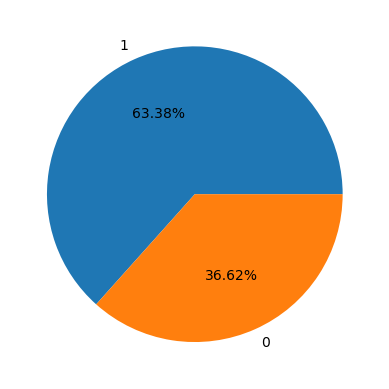

In [10]:
plt.pie(new_df['is_duplicate'].value_counts().values,labels=new_df['is_duplicate'].unique(),autopct='%0.2f%%');

In [83]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

# Feature Engineering

In [11]:
# number of charcaters
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()

In [12]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50


In [13]:
'Consequences of Bhopal gas tragedy?'.split()

['Consequences', 'of', 'Bhopal', 'gas', 'tragedy?']

In [14]:
# number of words
new_df['q1_num_words']=new_df['question1'].apply(lambda i:len(i.split(' ')))
new_df['q2_num_words']=new_df['question2'].apply(lambda i:len(i.split(' ')))

In [15]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9


In [98]:
'How Heaven is described in "The Bible"?'.replace('"','')

'How Heaven is described in The Bible?'

In [99]:
# set(map(lambda a: a**2,[1,2,3,3,2,3,1,4,2,1,2]))

In [100]:
new_df[new_df['is_duplicate']==1].loc[35957]

id                                                     35957
qid1                                                   65627
qid2                                                   65628
question1            How Heaven is described in "The Bible"?
question2       How is Heaven described according the Bible?
is_duplicate                                               1
q1_len                                                    39
q2_len                                                    44
q1_num_words                                               7
q2_num_words                                               7
Name: 35957, dtype: object

In [102]:
# map(func,iterable)

In [ ]:
set(map(lambda word:word.lower().strip(),row['question1'].split(' ')))

In [103]:
'How Heaven is described in The Bible?'.split(' ')

['How', 'Heaven', 'is', 'described', 'in', 'The', 'Bible?']

In [21]:
a=set(map(lambda word:word.lower().strip(),['How', 'Heaven','the', 'is', 'described', 'in', 'The', 'Bible?']))
a

{'bible?', 'described', 'heaven', 'how', 'in', 'is', 'the'}

In [23]:
b=set(map(lambda word:word.lower().strip(),'How is Heaven described according the Bible?'.split(' ')))
b

{'according', 'bible?', 'described', 'heaven', 'how', 'is', 'the'}

In [106]:
len(a)+len(b)

14

In [107]:
len(a&b)

6

In [31]:
# number of common words
def common_words(row):
#     return (row)
    w1=set(map(lambda word:word.lower().strip(),row['question1'].split(' ')))
    w2=set(map(lambda word:word.lower().strip(),row['question2'].split(' ')))
    return len(w1&w2)

    

In [32]:
new_df['word_common']=new_df.apply(common_words,axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_total,word_common
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,24,11
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,23,7
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,34,2
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,32,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,13,3


In [110]:
new_df.tail(1)['question1']

312470    What would the Modi-led government do in case ...
Name: question1, dtype: object

In [28]:
def total_words(row):
    w1=set(map(lambda word:word.lower().strip(),row['question1'].split(' ')))
    w2=set(map(lambda word:word.lower().strip(),row['question2'].split(' ')))
    return (len(w1)+len(w2))

    

In [29]:
new_df['word_total']=new_df.apply(total_words,axis=1)

In [30]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_total
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,13
...,...,...,...,...,...,...,...,...,...,...,...
243932,243932,26193,356455,What are some good web scraping tutorials?,What are some good web scraping programs?,1,42,41,7,7,14
91980,91980,154063,154064,Can I apply for internet banking in SBI withou...,I have internet banking kit of SBI but it's no...,0,68,61,12,12,24
266955,266955,133017,384210,How much HE laundry detergent do you use in a ...,Can I use regular Dawn dishsoap in my dishwash...,0,73,98,14,17,30
71112,71112,122427,122428,What is the best way to understand and learn m...,What are some of the best ways to learn math?,1,51,45,10,10,20


In [33]:
new_df['word_shae']=round(new_df['word_common']/new_df['word_total'],2)

In [34]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_total,word_common,word_shae
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,24,11,0.46
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,23,7,0.30
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,34,2,0.06
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,32,0,0.00
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,13,3,0.23


# Analysis of feature

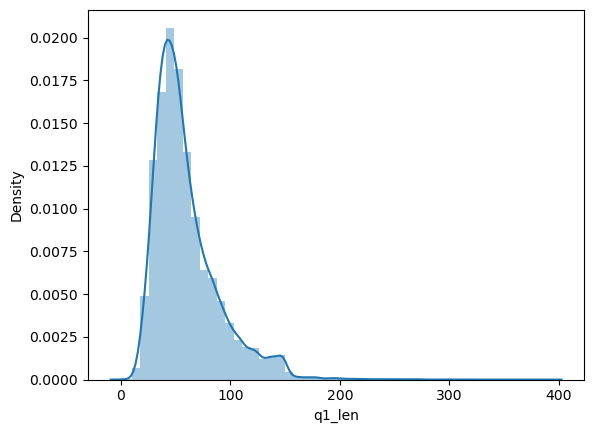

In [116]:
sns.distplot(new_df['q1_len'])
plt.show()


In [35]:
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average number of characters',int(new_df['q1_len'].mean()))

minimum characters 2
maximum characters 391
average number of characters 59


In [118]:
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average number of characters',int(new_df['q2_len'].mean()))

minimum characters 6
maximum characters 1151
average number of characters 60


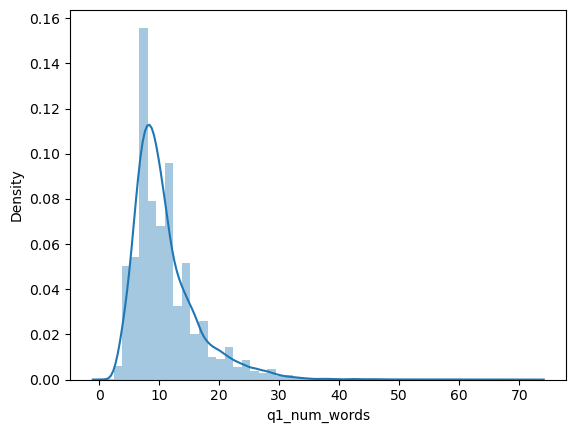

In [119]:
sns.distplot(new_df['q1_num_words'])
plt.show()


In [120]:
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average number of words',int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 72
average number of words 10


In [121]:
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average number of words',int(new_df['q2_num_words'].mean()))

minimum words 1
maximum words 237
average number of words 11


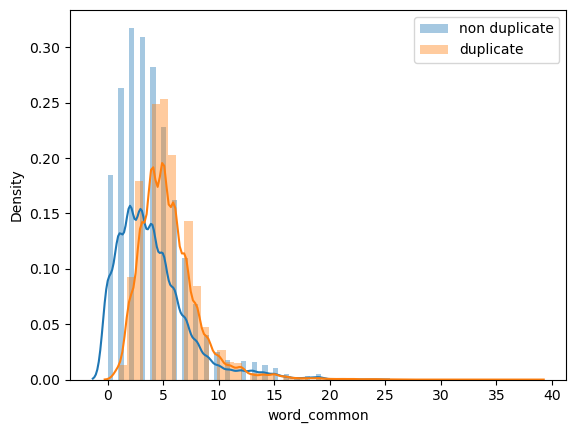

In [122]:
# Common Words
sns.distplot(new_df[new_df['is_duplicate']==0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_common'],label='duplicate')
plt.legend()
plt.show()

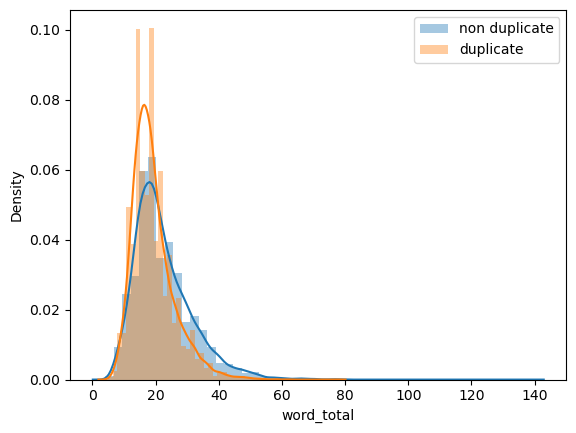

In [123]:
# total Words
sns.distplot(new_df[new_df['is_duplicate']==0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_total'],label='duplicate')
plt.legend()
plt.show()

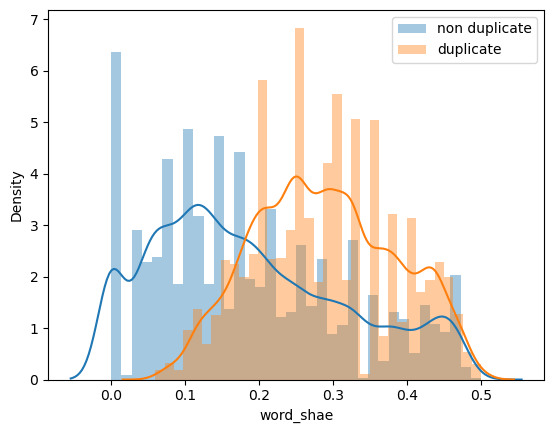

In [124]:
# Words share
sns.distplot(new_df[new_df['is_duplicate']==0]['word_shae'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_shae'],label='duplicate')
plt.legend()
plt.show()

In [125]:
ques_df=new_df[['question1','question2']]
ques_df.head()

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [126]:
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_shae
398782,1,76,77,12,12,11,24,0.46
115086,0,49,57,12,15,7,23,0.30
327711,0,105,120,25,17,2,34,0.06
367788,0,59,146,12,30,0,32,0.00
151235,0,35,50,5,9,3,13,0.23


In [127]:
from sklearn.feature_extraction.text import CountVectorizer # bagwords

In [59]:
# import numpy as np

# arr = np.arange(12).reshape(4, 3)
# print(arr)
# # Split at the 1st and 3rd index (row)
# result = np.vsplit(arr, [1, 3])

# print(result)


In [134]:
q=list(ques_df['question1'])+list(ques_df['question2'])
cv=CountVectorizer(max_features=3000)
np.vsplit(cv.fit_transform(q).toarray(),2)

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)]

In [135]:
# Bag of words
questions=list(ques_df['question1'])+list(ques_df['question2']) # merge text(corpus)
cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [138]:
temp_df2

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
266955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [58]:
final_df=pd.concat([final_df,temp_df],axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_shae,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,76,77,12,12,11,24,0.46,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,49,57,12,15,7,23,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,105,120,25,17,2,34,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,59,146,12,30,0,32,0.00,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,0,35,50,5,9,3,13,0.23,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test=train_test_split(final_df.iloc[:,0:-1].values,final_df.iloc[:,-1].values,test_size=0.2,random_state=0)

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [70]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [71]:
y_pred_train=rf.predict(x_train)
y_pred=rf.predict(x_test)

In [72]:
accuracy_score(y_pred_train,y_train)

1.0

In [73]:
accuracy_score(y_pred,y_test)

0.9991666666666666

In [66]:
from xgboost import XGBClassifier

In [67]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [120]:
y_pred_train=xgb.predict(x_train)
y_pred=xgb.predict(x_test)

In [121]:

accuracy_score(y_pred_train,y_train)

0.7735416666666667

In [122]:
accuracy_score(y_pred,y_test)

0.7218333333333333

In [11]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0
...,...,...,...,...,...,...
243932,243932,26193,356455,What are some good web scraping tutorials?,What are some good web scraping programs?,1
91980,91980,154063,154064,Can I apply for internet banking in SBI withou...,I have internet banking kit of SBI but it's no...,0
266955,266955,133017,384210,How much HE laundry detergent do you use in a ...,Can I use regular Dawn dishsoap in my dishwash...,0
71112,71112,122427,122428,What is the best way to understand and learn m...,What are some of the best ways to learn math?,1


In [96]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
174254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
351675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12404,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49538,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
171412,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108821,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
252473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
235712,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
temp_df['is_duplicate']=df['is_duplicate']

In [102]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
174254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
351675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12404,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49538,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,1
171412,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
